In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the API key.
from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90.000, 90.000, size = 1500)
lngs = np.random.uniform(-180.000, 180.000, size= 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(38.73075198137511, 133.75690053384693),
 (-63.87934719364651, -93.64999516871583),
 (26.70617556173808, 62.01262860458465),
 (-24.739699091339318, 173.6336035266088),
 (-1.588138918667184, -114.31229926713979),
 (29.945638121740217, -106.6701725884213),
 (-73.59939486032864, -176.61026170160716),
 (-36.169622037865516, 152.51429072779308),
 (-21.940648578697292, 83.54088228315084),
 (25.002667945189785, -68.38790090546948),
 (-70.64859325389912, -86.56519589090173),
 (18.407844952423034, 29.63825157517988),
 (13.801547109866135, -106.89190378926078),
 (60.034673384763494, -116.52420363170604),
 (-76.29455006826046, 136.2959140912942),
 (-32.550350892579544, 97.38683758853642),
 (85.95345298386158, -49.07843113278861),
 (-23.04450614717662, 151.6921452863528),
 (62.212442657552515, -33.81472665534204),
 (1.6191235056994202, -179.18832028305013),
 (-76.62653648200023, -20.49111478876935),
 (32.75097358137276, -52.22729043175255),
 (-15.029463403701754, 163.65249841768207),
 (6.06539028

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
cities

['sakaiminato',
 'punta arenas',
 'turbat',
 'vao',
 'coahuayana',
 'ahumada',
 'vaini',
 'ulladulla',
 'hithadhoo',
 'cockburn town',
 'marawi',
 'manzanillo',
 'hay river',
 'hobart',
 'geraldton',
 'upernavik',
 'gladstone',
 'tasiilaq',
 'vaitupu',
 'ushuaia',
 'saint george',
 'luganville',
 'lagos',
 'busselton',
 'bluff',
 'san quintin',
 'barentsburg',
 'jamestown',
 'paidha',
 'taolanaro',
 'ahipara',
 'cape town',
 'severo-kurilsk',
 'rikitea',
 'port elizabeth',
 'hermanus',
 'vanimo',
 'vardo',
 'sao joao da barra',
 'mataura',
 'lebu',
 'primorsk',
 'kabanjahe',
 'kodiak',
 'the valley',
 'sao paulo de olivenca',
 'yemelyanovo',
 'lodja',
 'kulhudhuffushi',
 'avarua',
 'tambacounda',
 'barrow',
 'buchanan',
 'san cristobal',
 'saint-philippe',
 'kahului',
 'kargasok',
 'saleaula',
 'albany',
 'rocha',
 'iqaluit',
 'san joaquin',
 'qaanaaq',
 'caravelas',
 'kysyl-syr',
 'ossora',
 'tiksi',
 'sitka',
 'morro bay',
 'mildura',
 'broken hill',
 'port alfred',
 'sao filipe',
 '

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | sakaiminato
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | turbat
Processing Record 4 of Set 1 | vao
Processing Record 5 of Set 1 | coahuayana
Processing Record 6 of Set 1 | ahumada
City not found. Skipping...
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | ulladulla
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | cockburn town
Processing Record 11 of Set 1 | marawi
Processing Record 12 of Set 1 | manzanillo
Processing Record 13 of Set 1 | hay river
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | geraldton
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | gladstone
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | saint george
Processing Record 22 of Set 1 | luganville
Processing Record 23 of Set 1 | lagos
Pr

Processing Record 41 of Set 4 | saint-augustin
Processing Record 42 of Set 4 | vila velha
Processing Record 43 of Set 4 | gorno-chuyskiy
City not found. Skipping...
Processing Record 44 of Set 4 | morganton
Processing Record 45 of Set 4 | atar
Processing Record 46 of Set 4 | bongandanga
Processing Record 47 of Set 4 | pochutla
Processing Record 48 of Set 4 | sembe
Processing Record 49 of Set 4 | taoudenni
Processing Record 50 of Set 4 | havoysund
Processing Record 1 of Set 5 | alugan
Processing Record 2 of Set 5 | amderma
City not found. Skipping...
Processing Record 3 of Set 5 | riyadh
Processing Record 4 of Set 5 | asmar
Processing Record 5 of Set 5 | chipata
Processing Record 6 of Set 5 | chuy
Processing Record 7 of Set 5 | sambava
Processing Record 8 of Set 5 | makhu
Processing Record 9 of Set 5 | umm jarr
City not found. Skipping...
Processing Record 10 of Set 5 | businga
Processing Record 11 of Set 5 | georgetown
Processing Record 12 of Set 5 | esna
Processing Record 13 of Set 5 

Processing Record 29 of Set 8 | emba
Processing Record 30 of Set 8 | villarrobledo
Processing Record 31 of Set 8 | muros
Processing Record 32 of Set 8 | bratsk
Processing Record 33 of Set 8 | gazli
Processing Record 34 of Set 8 | labuan
Processing Record 35 of Set 8 | dolores
Processing Record 36 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 37 of Set 8 | morondava
Processing Record 38 of Set 8 | coihaique
Processing Record 39 of Set 8 | mishan
Processing Record 40 of Set 8 | college
Processing Record 41 of Set 8 | alta
Processing Record 42 of Set 8 | karratha
Processing Record 43 of Set 8 | flin flon
Processing Record 44 of Set 8 | mircea voda
Processing Record 45 of Set 8 | valparaiso
Processing Record 46 of Set 8 | kipini
Processing Record 47 of Set 8 | lavrentiya
Processing Record 48 of Set 8 | ketchikan
Processing Record 49 of Set 8 | batsfjord
Processing Record 50 of Set 8 | sterling
Processing Record 1 of Set 9 | launceston
Processing Record 2 of Set 9 | u

Processing Record 13 of Set 12 | rolim de moura
City not found. Skipping...
Processing Record 14 of Set 12 | el salto
Processing Record 15 of Set 12 | igarka
Processing Record 16 of Set 12 | asosa
Processing Record 17 of Set 12 | kirakira
Processing Record 18 of Set 12 | tual
Processing Record 19 of Set 12 | dongsheng
Processing Record 20 of Set 12 | kadambur
Processing Record 21 of Set 12 | bilma
Processing Record 22 of Set 12 | araceli
Processing Record 23 of Set 12 | kolondieba
Processing Record 24 of Set 12 | turmalina
Processing Record 25 of Set 12 | mahon
Processing Record 26 of Set 12 | semikarakorsk
Processing Record 27 of Set 12 | minab
Processing Record 28 of Set 12 | la paz
Processing Record 29 of Set 12 | peikang
City not found. Skipping...
Processing Record 30 of Set 12 | kloulklubed
Processing Record 31 of Set 12 | labytnangi
Processing Record 32 of Set 12 | santa cruz del sur
Processing Record 33 of Set 12 | ugento
Processing Record 34 of Set 12 | tigil
Processing Record

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sakaiminato,35.5500,133.2333,33.73,73,100,17.92,JP,2022-02-08 22:09:52
1,punta arenas,-53.1500,-70.9167,57.31,41,75,13.80,CL,2022-02-08 22:09:52
2,turbat,26.0023,63.0440,65.98,22,0,9.48,PK,2022-02-08 22:09:53
3,vao,-22.6667,167.4833,80.89,88,59,21.00,NC,2022-02-08 22:06:15
4,coahuayana,18.7333,-103.6833,89.08,48,0,7.90,MX,2022-02-08 22:09:53
5,vaini,-21.2000,-175.2000,84.36,89,40,13.80,TO,2022-02-08 22:09:54
6,ulladulla,-35.3500,150.4667,75.87,58,0,2.44,AU,2022-02-08 22:09:54
7,hithadhoo,-0.6000,73.0833,82.45,69,100,13.85,MV,2022-02-08 22:09:54
8,cockburn town,21.4612,-71.1419,78.76,65,40,17.27,TC,2022-02-08 22:09:55
9,marawi,7.9986,124.2928,64.65,94,100,1.63,PH,2022-02-08 22:09:55


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

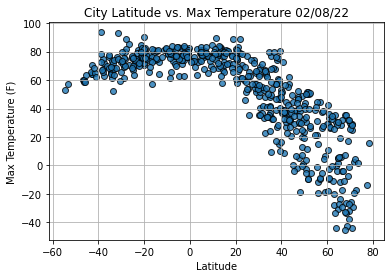

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

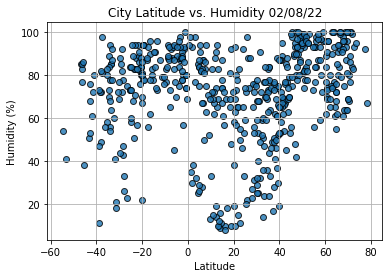

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

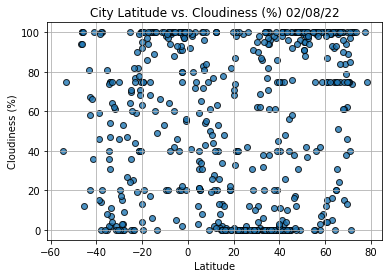

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

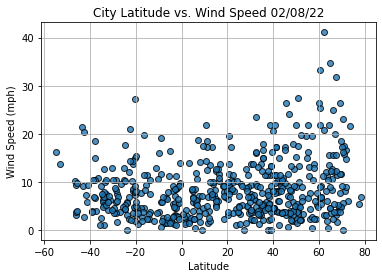

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()